In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
upload = files.upload()

Saving HR_comma_sep latih.csv to HR_comma_sep latih.csv


In [3]:
#https://www.kaggle.com/datasets/mahmoudshogaa/hr-comma-sep
#tapi jangan lgsg pake data dari link di atas untuk train

df = pd.read_csv('HR_comma_sep latih.csv', sep=';')

In [4]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14989,0.43,0.57,2,159,3,1,1,0,technical,low
14990,0.89,0.88,5,228,5,1,1,0,support,low
14991,0.09,0.81,6,257,4,0,1,0,support,low
14992,0.40,0.48,2,155,3,0,1,0,support,low


#Exploratory Data Analysis

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000,14994.000000
mean,0.612930,0.716136,3.803388,201.057890,3.498333,0.144658,0.237828,0.021275
std,0.248608,0.171157,1.232315,49.940979,1.460351,0.351767,0.425768,0.144305
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [7]:
#Menghitung kelas pada target variable
df['left'].value_counts()

,count
left,
0,11428
1,3566


#Preprocessing

Encode

In [8]:
salary_ohe = pd.get_dummies(df['salary'], prefix='salary', dtype= int) #onehotencode

In [9]:
salary_ohe

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14989,0,1,0
14990,0,1,0
14991,0,1,0
14992,0,1,0


In [10]:
df = df.drop(['salary'], axis=1)

In [11]:
df = pd.concat([df, salary_ohe], axis=1)

In [18]:
df['sales'].nunique()

10

In [14]:
salary_ohe

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14989,0,1,0
14990,0,1,0
14991,0,1,0
14992,0,1,0


In [19]:
#fungsi hash untuk solve masalah kategori yang harus di encode
df['sales'] = df['sales'].apply(lambda x:hash(x)%1000)

In [20]:
df = df[['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident',	'promotion_last_5years',	'sales', 'salary_high',	'salary_low',	'salary_medium', 'left']]

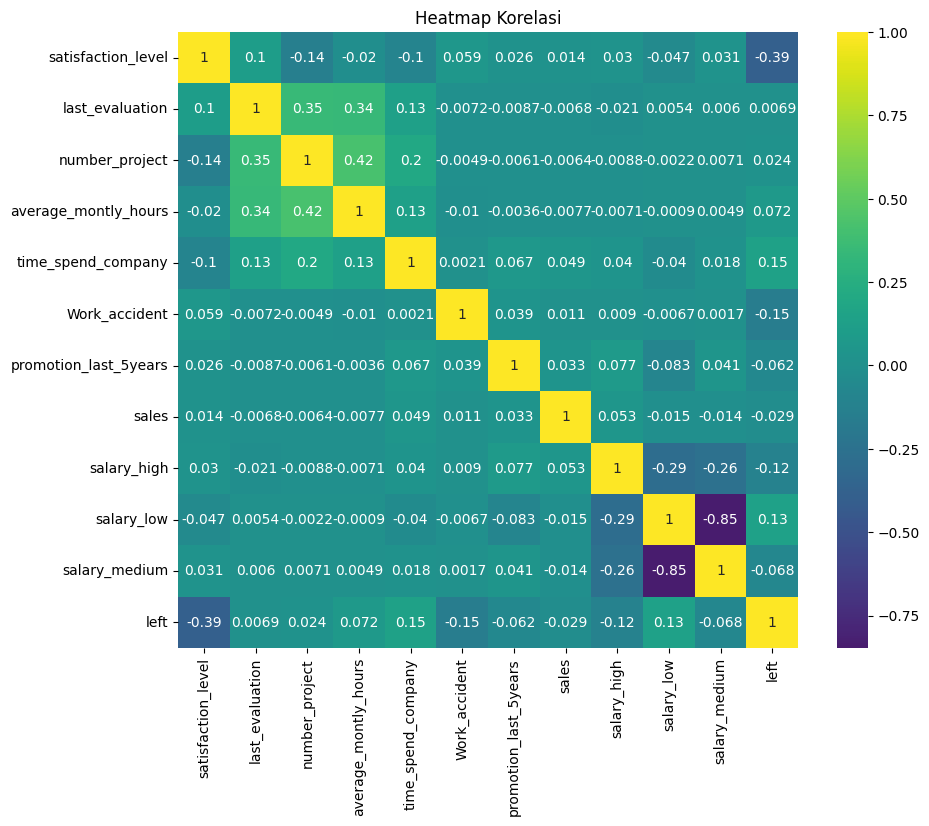

In [21]:
correlation_matrix = df.corr()

# Membuat heatmap menggunakan seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)
plt.title('Heatmap Korelasi')
plt.show()

In [22]:
df = df[['satisfaction_level', 'time_spend_company', 'Work_accident', 'salary_high', 'salary_low', 'left']]

Normalisasi

In [23]:
for i in['satisfaction_level', 'time_spend_company', 'Work_accident', 'salary_high', 'salary_low']:
  df[i] = (df[i]-min(df[i]))/(max(df[i])-min(df[i]))

In [24]:
df['left'].value_counts()

,count
left,
0,11428
1,3566


Data Partitioning

In [25]:
X = df.drop(['left'], axis=1) #Independent Variable

In [26]:
y = df['left'] #Dependent variable/target/label

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [30]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
y_hat = rf.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report

acc = accuracy_score(y_hat, y_test)
recall = recall_score(y_hat, y_test)
precision = precision_score(y_hat, y_test)
target_names = ['0', '1']
print(classification_report(y_test, y_hat, target_names=target_names))



print('acc :', acc)
print('recall :', recall)
print('precision :',  precision)


              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2286
           1       0.89      0.91      0.90       713

    accuracy                           0.95      2999
   macro avg       0.93      0.94      0.93      2999
weighted avg       0.95      0.95      0.95      2999

acc : 0.9516505501833945
recall : 0.8869209809264306
precision : 0.9130434782608695
